<h1 style="text-align:center; font-size: 32px;">
📘 Projet : <br>
<span style="font-weight:600;">Data-Driven & Physics-Informed Calibration of a Simple EV Energy Model</span>
</h1>


## 1) Get Data


In [ ]:
import pandas as pd
data=pd.read_csv("Vehicle Data.csv")

## 2) Python Library


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3) EDA


In [5]:
display(data.head())

,Vehicle ID,Speed (km/h),Acceleration (m/s²),Braking intensity (%),Cornering speed (km/h),Battery SoC (%),Battery current (A),Battery temperature (°C),Motor speed (rpm),Motor torque (Nm),...,Distance traveled (km),Altitude (m),Heading (°),Throttle position (%),Regen braking state,Trip distance (km),Trip time (min),Ambient temperature (°C),Motor fault codes,Driver Behavior rating
0,EV006,91,2.566710,73,28,72,-6.984005,34,2707,76,...,37.306167,235,175,84,On,31.433572,20.500156,27.525410,0,1
1,EV006,98,2.421393,68,31,85,-7.413418,54,2658,94,...,65.286368,204,182,77,On,33.894417,20.542071,28.946583,0,1
2,EV004,110,6.682630,48,33,71,-8.713728,77,2693,67,...,118.989979,226,177,68,Off,67.491564,36.481926,26.375666,0,8
3,EV004,72,5.593598,69,27,71,-6.170326,78,2899,62,...,143.252318,198,176,60,On,67.630923,55.587060,27.029387,0,4
4,EV012,62,1.424797,90,31,89,-6.522782,43,2862,95,...,31.285616,240,172,62,On,30.639144,29.180137,26.753896,0,1


In [7]:
print(data.shape)

(10000, 22)


In [9]:
print(data.dtypes)

Vehicle ID                      object
Speed (km/h)                     int64
Acceleration (m/s²)            float64
Braking intensity (%)            int64
Cornering speed (km/h)           int64
Battery SoC (%)                  int64
Battery current (A)            float64
Battery temperature (°C)         int64
Motor speed (rpm)                int64
Motor torque (Nm)                int64
Regen braking level (%)          int64
Energy consumption (kWh/km)    float64
Distance traveled (km)         float64
Altitude (m)                     int64
Heading (°)                      int64
Throttle position (%)            int64
Regen braking state             object
Trip distance (km)             float64
Trip time (min)                float64
Ambient temperature (°C)       float64
Motor fault codes                int64
Driver Behavior rating           int64
dtype: object


In [11]:
data.nunique()

Vehicle ID                        19
Speed (km/h)                      88
Acceleration (m/s²)            10000
Braking intensity (%)             59
Cornering speed (km/h)            26
Battery SoC (%)                   40
Battery current (A)            10000
Battery temperature (°C)          51
Motor speed (rpm)                932
Motor torque (Nm)                 41
Regen braking level (%)           25
Energy consumption (kWh/km)    10000
Distance traveled (km)         10000
Altitude (m)                     101
Heading (°)                       21
Throttle position (%)             49
Regen braking state                2
Trip distance (km)             10000
Trip time (min)                10000
Ambient temperature (°C)       10000
Motor fault codes                  5
Driver Behavior rating            10
dtype: int64

In [13]:
print(data.describe())

       Speed (km/h)  Acceleration (m/s²)  Braking intensity (%)  \
count  10000.000000         10000.000000           10000.000000   
mean      86.614200             5.255108              68.998600   
std       19.580855             2.026383              12.990138   
min       43.000000             0.502433              40.000000   
25%       71.000000             3.799916              59.000000   
50%       87.000000             5.260390              69.000000   
75%      102.000000             6.723391              79.000000   
max      130.000000             9.999887              98.000000   

       Cornering speed (km/h)  Battery SoC (%)  Battery current (A)  \
count            10000.000000     10000.000000         10000.000000   
mean                27.548800        79.538600            -7.013123   
std                  5.705127         9.387924             1.144984   
min                 15.000000        60.000000            -8.999699   
25%                 23.000000        72.0

In [21]:
print(data.isnull().sum())

Vehicle ID                     0
Speed (km/h)                   0
Acceleration (m/s²)            0
Braking intensity (%)          0
Cornering speed (km/h)         0
Battery SoC (%)                0
Battery current (A)            0
Battery temperature (°C)       0
Motor speed (rpm)              0
Motor torque (Nm)              0
Regen braking level (%)        0
Energy consumption (kWh/km)    0
Distance traveled (km)         0
Altitude (m)                   0
Heading (°)                    0
Throttle position (%)          0
Regen braking state            0
Trip distance (km)             0
Trip time (min)                0
Ambient temperature (°C)       0
Motor fault codes              0
Driver Behavior rating         0
dtype: int64


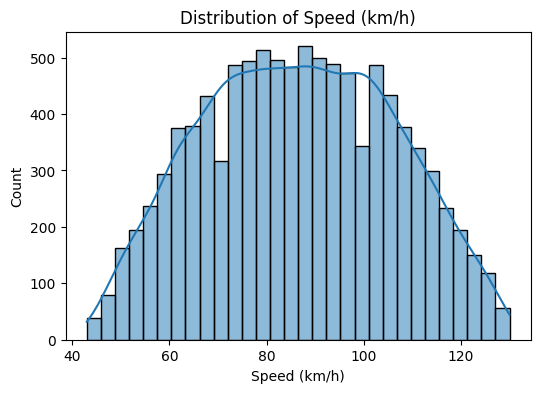

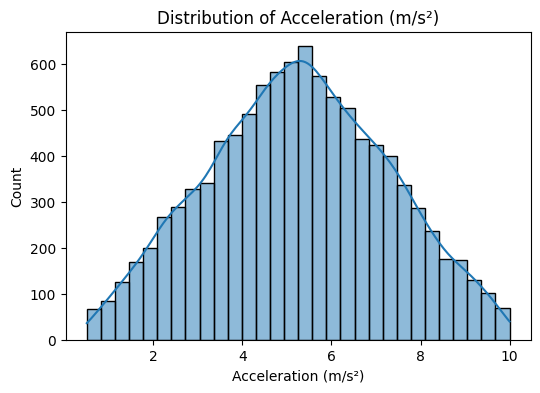

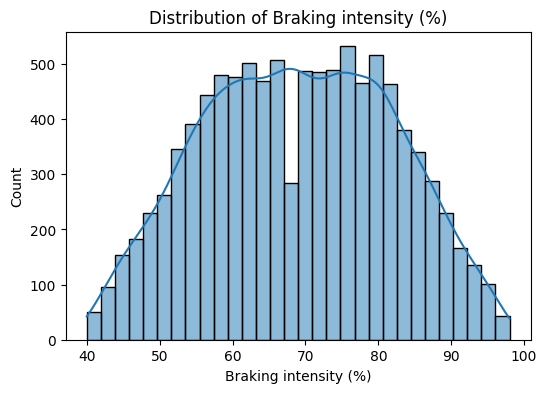

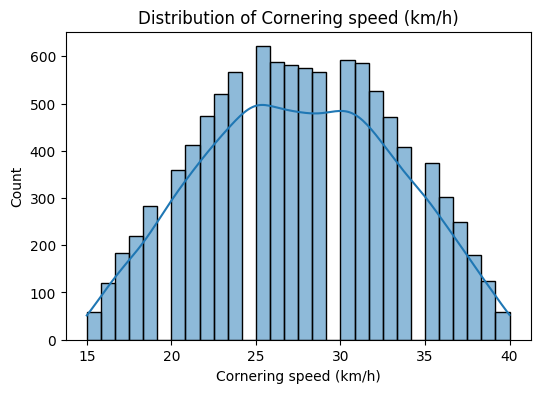

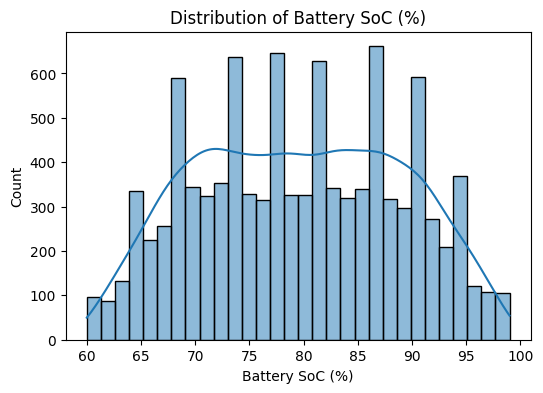

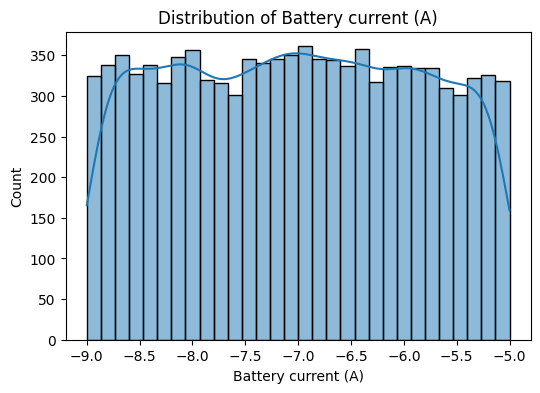

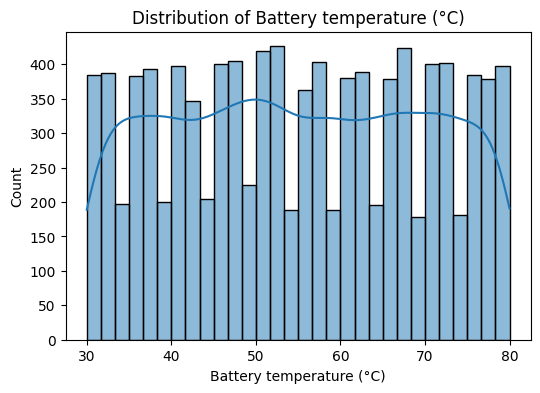

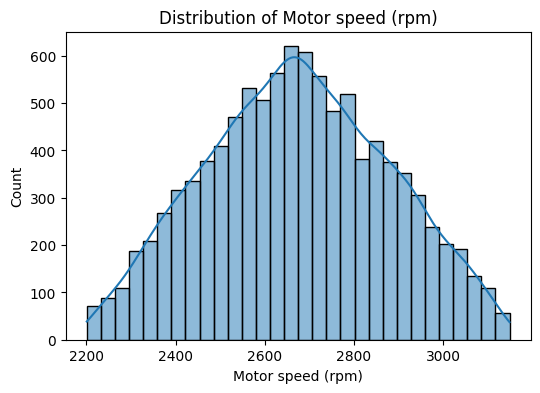

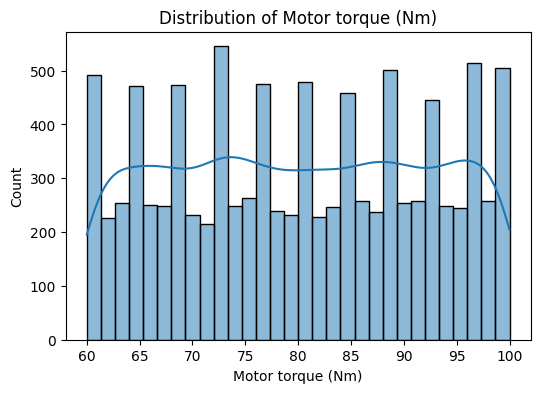

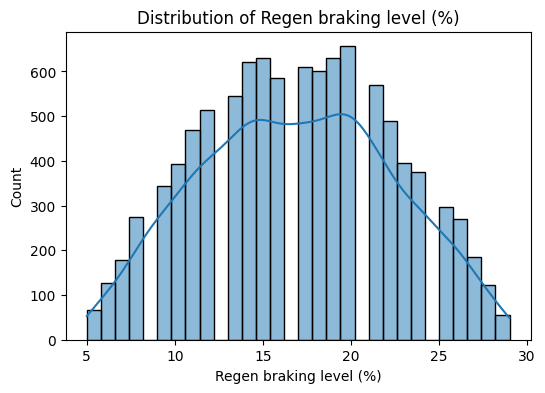

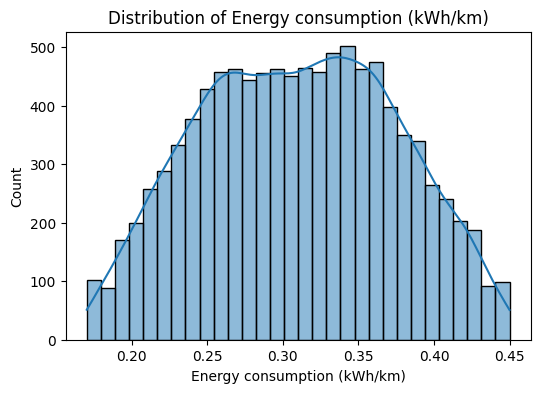

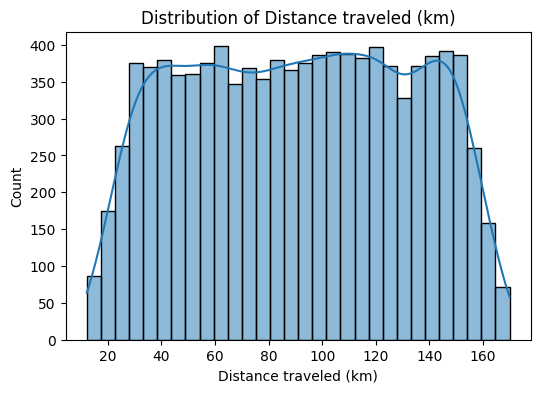

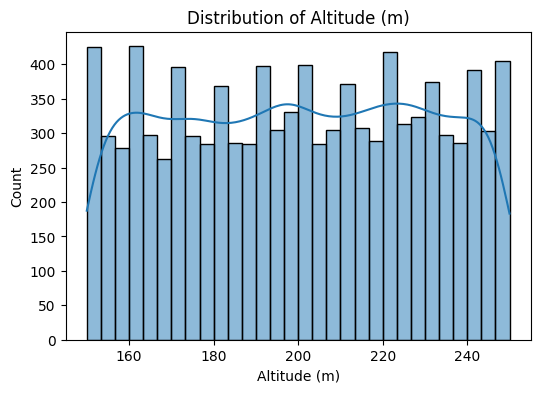

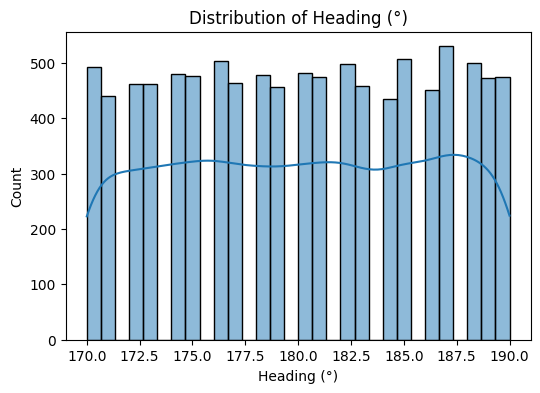

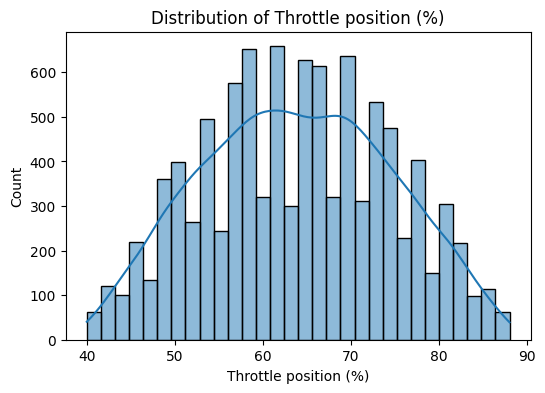

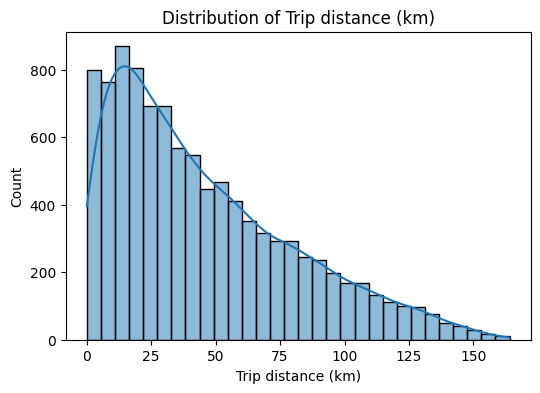

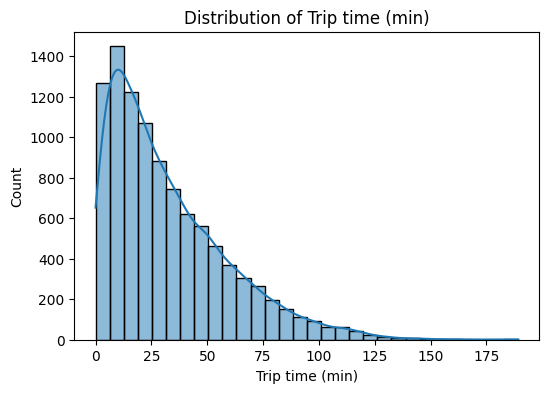

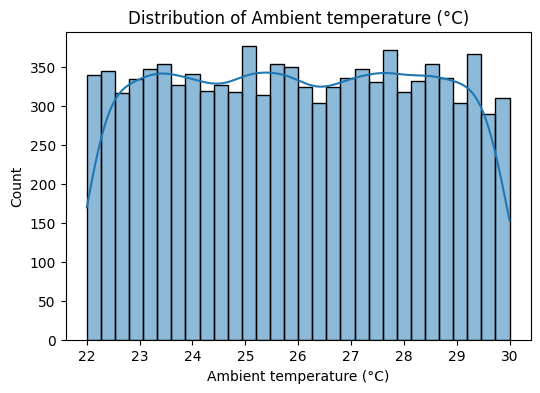

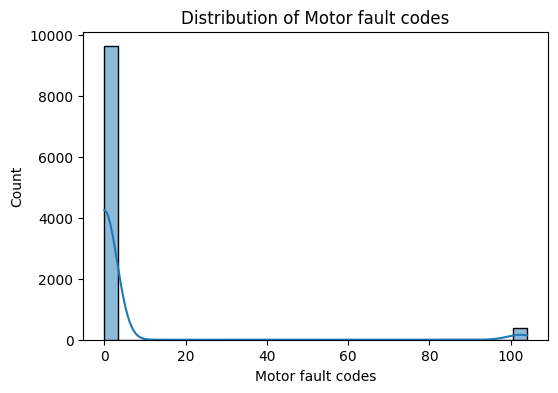

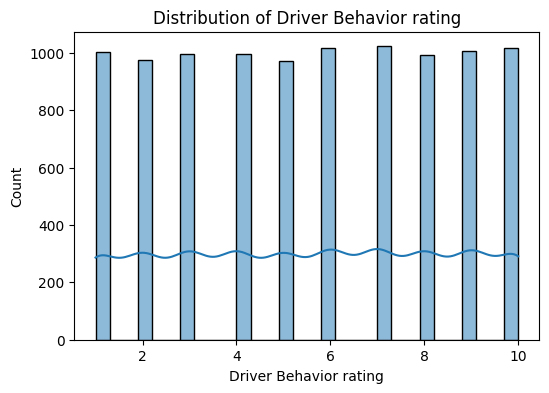

In [23]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

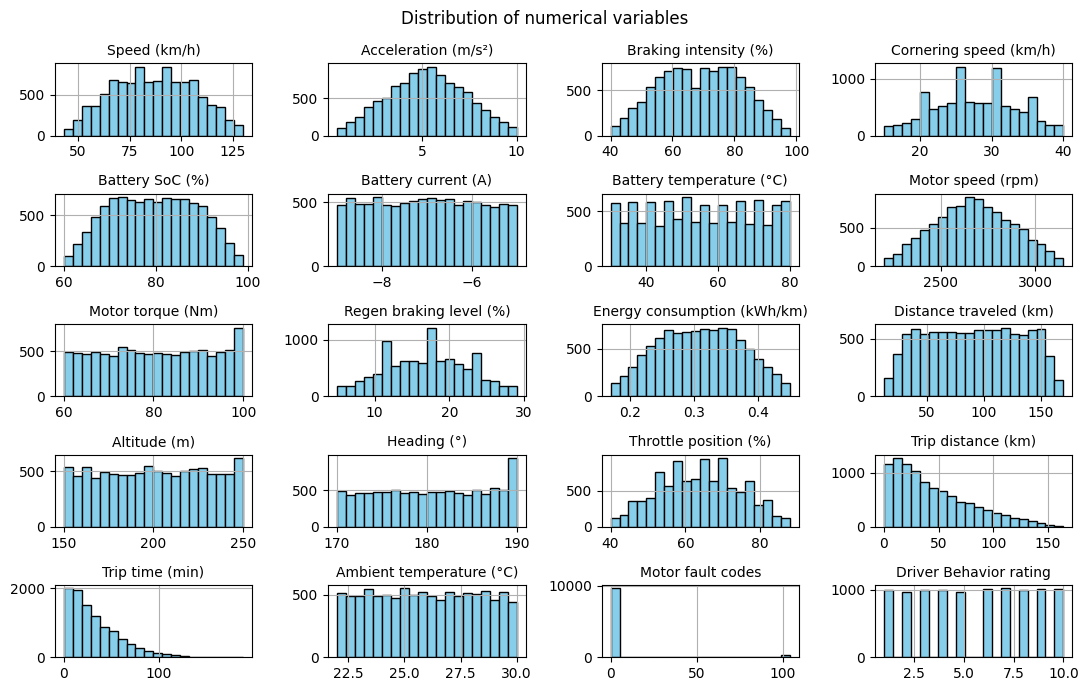

In [25]:
num_cols = data.select_dtypes(include='number').columns

axes = data[num_cols].hist(bins=20, figsize=(11, 7), color='skyblue', edgecolor='black')

for ax in axes.flatten():
    ax.title.set_fontsize(10)

plt.suptitle("Distribution of numerical variables", fontsize=12)
plt.tight_layout()
plt.show()

Columns used for corrélation :
Index(['Speed (km/h)', 'Acceleration (m/s²)', 'Braking intensity (%)',
       'Cornering speed (km/h)', 'Battery SoC (%)', 'Battery current (A)',
       'Battery temperature (°C)', 'Motor speed (rpm)', 'Motor torque (Nm)',
       'Regen braking level (%)', 'Energy consumption (kWh/km)',
       'Distance traveled (km)', 'Altitude (m)', 'Heading (°)',
       'Throttle position (%)', 'Trip distance (km)', 'Trip time (min)',
       'Ambient temperature (°C)', 'Motor fault codes',
       'Driver Behavior rating'],
      dtype='object')


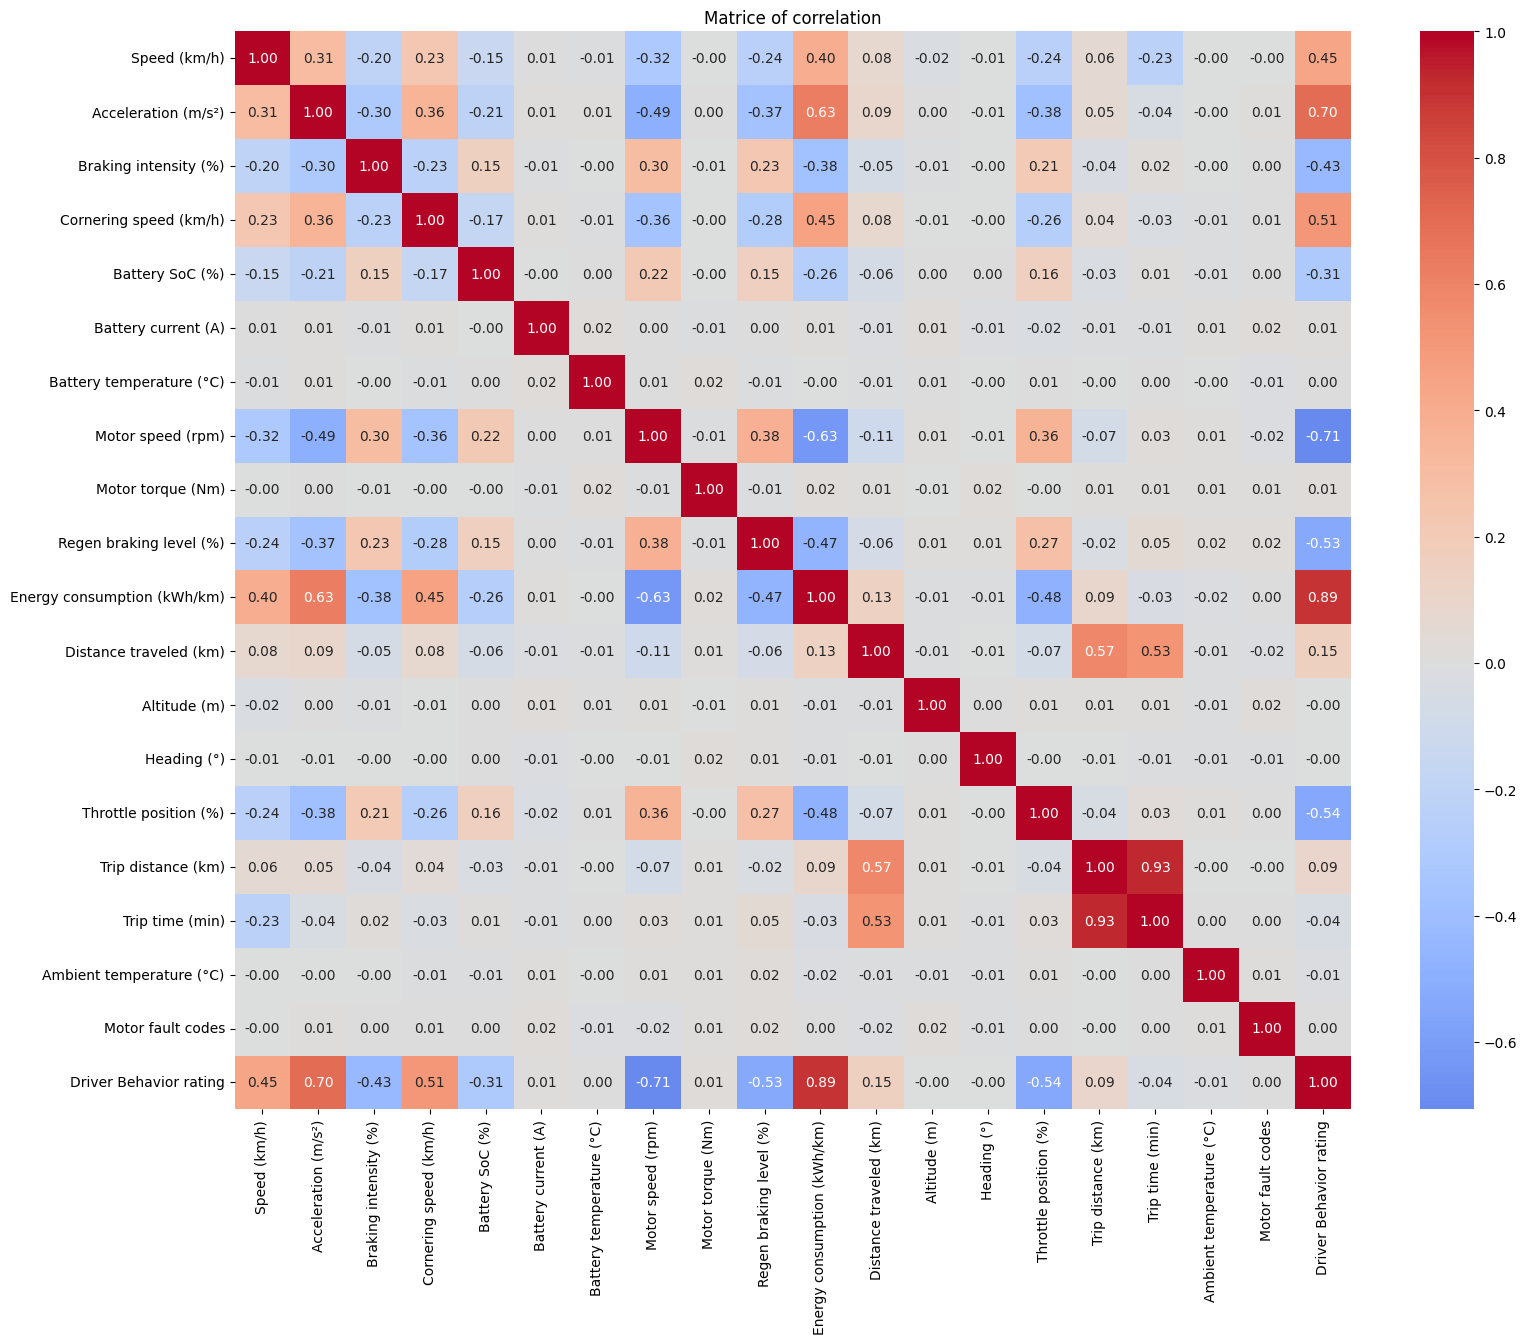

In [29]:
numeric_cols = data.select_dtypes(include=['int64', 'float64', 'bool']).columns

print("Columns used for corrélation :")
print(numeric_cols)

# Calculer la matrice de corrélation
corr_matrix = data[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matrice of correlation")
plt.show()

## 4) Choice of target

Correlated variable with the target :
 Driver Behavior rating     0.894131
Motor speed (rpm)         -0.632674
Acceleration (m/s²)        0.627151
Throttle position (%)     -0.479754
Regen braking level (%)   -0.469966
Cornering speed (km/h)     0.454045
Speed (km/h)               0.396028
Braking intensity (%)     -0.379767
Battery SoC (%)           -0.264948
Name: Energy consumption (kWh/km), dtype: float64


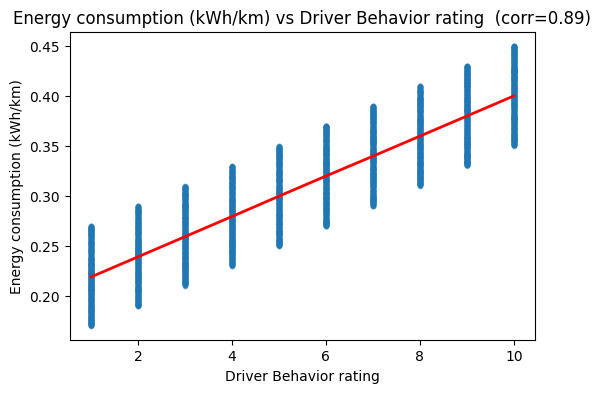

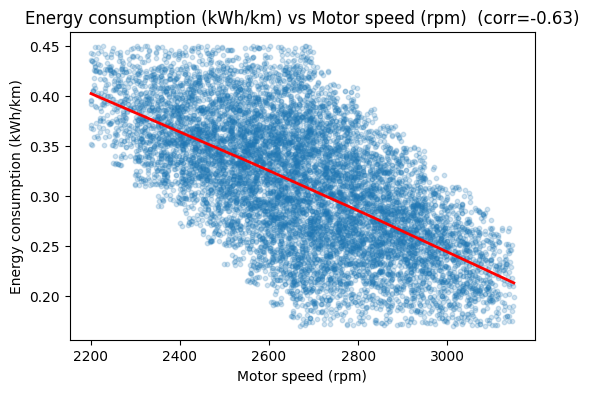

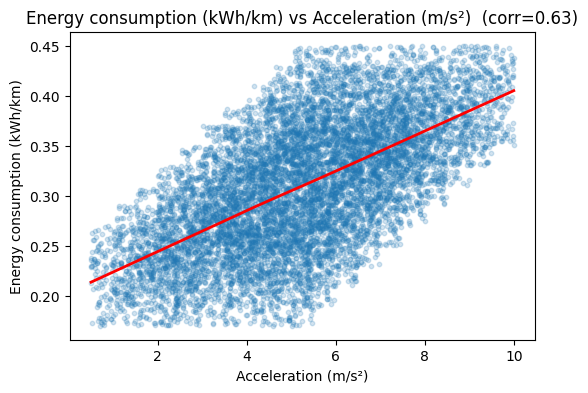

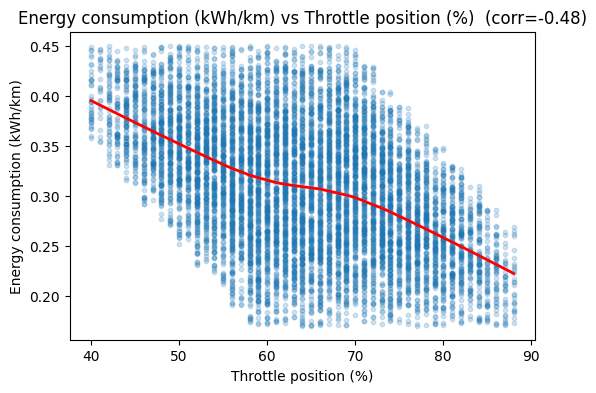

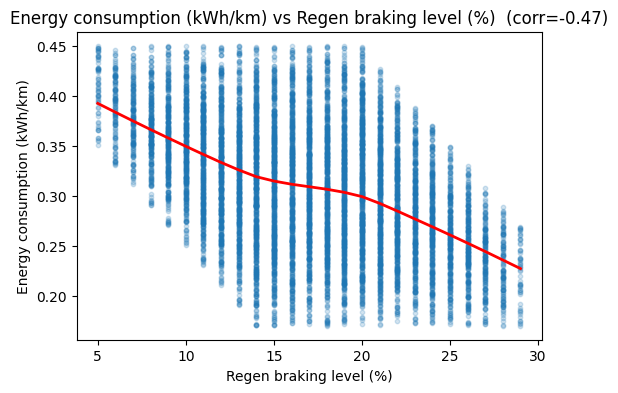

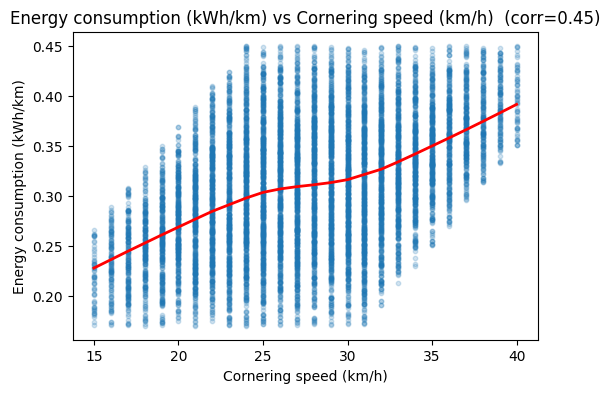

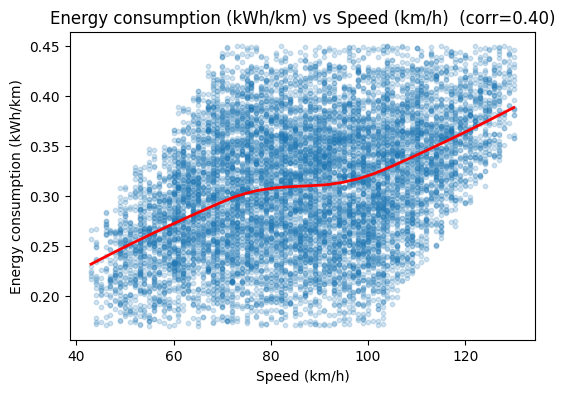

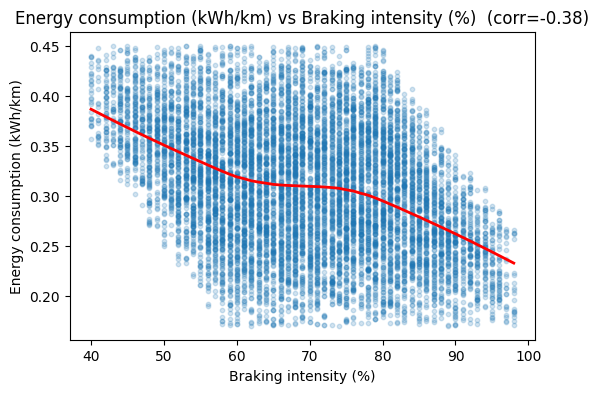

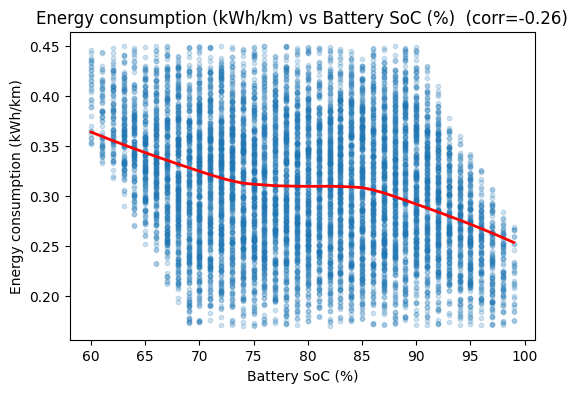

In [32]:
target = 'Energy consumption (kWh/km)'

corr = data.corr(numeric_only=True)[target].drop(target)

# Garder les variables les plus corrélées
corr_vars = corr[abs(corr) > 0.2].sort_values(key=abs, ascending=False)
print("Correlated variable with the target :\n", corr_vars)


for var in corr_vars.index:
    plt.figure(figsize=(6,4))
    sns.regplot(
        data=data, x=var, y=target,
        scatter_kws={'alpha':0.2, 's':10},
        line_kws={'color':'red', 'linewidth':2},
        lowess=True
         )
    plt.title(f"{target} vs {var}  (corr={corr[var]:.2f})")
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()